#  Preparing a classification model using Naive Bayes for salary data 

In [1]:
!pip install --upgrade scikit-learn


In [2]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay



In [3]:
# Reading the data

df_train=pd.read_csv("SalaryData_Train.csv")

In [4]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_test=pd.read_csv("SalaryData_Test.csv")

In [6]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
df_train.shape

(30161, 14)

In [8]:
df_test.shape

(15060, 14)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [13]:
df_train.isin(["?"]).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
df_test.isin(["?"]).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [15]:
print(df_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [16]:
print(df_test[0:5])

   age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <

In [17]:
categorical=[var for var in df_train.columns if df_train[var].dtype=="O"]

print("There are {} categorical variables\n".format(len(categorical)))

print("The categorical variables are :\n\n",categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [18]:
df_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [19]:
df_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [20]:
for var in categorical:
    print(df_train[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [21]:
!pip install "numpy<1.24"

In [22]:

for var in categorical: 
    
    print(df_train[var].value_counts()/np.float64(len(df_train)))


 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

In [23]:
df_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [24]:
df_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [25]:
df_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [26]:
df_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [27]:
df_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [28]:
df_train.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [29]:
for var in categorical:
    print(var,"contains",len(df_train[var].unique()),"labels")

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


In [30]:
numerical=[var for var in df_train.columns if df_train[var].dtype!="O"]

print("The are {} numerical variables\n".format(len(numerical)))

print("The numerical values are :",numerical)

The are 5 numerical variables

The numerical values are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [31]:
df_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [32]:
df_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [33]:
# Seperating the data into training and testing

x=df_train.drop(["Salary"],axis=1)

y=df_train["Salary"]

In [34]:
# Importing the train,test model on the data

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [35]:
xtrain.shape

(21112, 13)

In [36]:
xtest.shape

(9049, 13)

In [37]:
xtrain.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [38]:
xtest.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [39]:
categorical=[col for col in xtrain.columns if xtrain[col].dtypes=="O"]
categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [40]:
categorical=[col for col in xtrain.columns if xtrain[col].dtypes!="O"]
categorical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [41]:
xtrain[categorical].isnull().mean()

age             0.0
educationno     0.0
capitalgain     0.0
capitalloss     0.0
hoursperweek    0.0
dtype: float64

In [42]:
for col in categorical:
    if xtrain[col].isnull().mean()>0:
        print(col,(xtrain[col].isnull().mean()))

In [43]:
for df2 in [xtrain,xtest]:
    df2["workclass"].fillna(xtrain["workclass"].mode()[0],inplace=True)
    df2["occupation"].fillna(xtrain["occupation"].mode()[0],inplace=True)
    df2["native"].fillna(xtrain["native"].mode()[0],inplace=True)
    

In [44]:
xtrain[categorical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [45]:
xtest[categorical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [46]:
xtrain.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [47]:
xtest.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [48]:
categorical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [49]:
xtrain[categorical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
18059,46,14,0,0,40
17866,64,7,0,0,40
9208,47,13,0,0,60
25495,34,12,0,0,40
17392,22,9,0,0,43


In [50]:
!pip install category_encoders

In [51]:
import category_encoders as ce

In [52]:
encoder=ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])


xtrain=encoder.fit_transform(xtrain)

xtest=encoder.fit_transform(xtest)

In [53]:
xtrain.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
18059,46,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17866,64,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9208,47,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25495,34,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17392,22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
xtrain.shape

(21112, 102)

In [55]:
xtest.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
14791,24,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6454,45,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8534,26,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14317,20,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26509,40,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
xtest.shape

(9049, 102)

In [57]:
cols=xtrain.columns

In [58]:
cols

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'education_1',
       'education_2',
       ...
       'native_31', 'native_32', 'native_33', 'native_34', 'native_35',
       'native_36', 'native_37', 'native_38', 'native_39', 'native_40'],
      dtype='object', length=102)

In [59]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

In [60]:
xtrain=pd.DataFrame(xtrain,columns=[cols])


In [61]:
xtrain

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,0.473684,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.421053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.526316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.157895,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.789474,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21107,-0.684211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21108,-0.947368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21109,-1.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21110,0.263158,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
xtest=pd.DataFrame(xtest,columns=[cols])

In [63]:
xtest

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,-0.684211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.421053,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.894737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.157895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9045,0.736842,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9046,0.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9047,-0.947368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
gnb=GaussianNB()

In [66]:
gnb.fit(xtrain,ytrain)

GaussianNB()

In [67]:
ypred=gnb.predict(xtest)
ypred

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [68]:
from sklearn.metrics import accuracy_score


In [69]:
print("Model accuracy score:{0:04f}".format(accuracy_score(ytest,ypred)))

Model accuracy score:0.734004


In [70]:
ypred_train=gnb.predict(xtrain)
ypred_train

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [71]:
print("Training set accuracy score: {0:0.4f}".format(accuracy_score(ytrain,ypred_train)))

Training set accuracy score: 0.7996


In [72]:
print("Training set score:{:.4f}".format(gnb.score(xtrain,ytrain)))

Training set score:0.7996


In [73]:
print("Training set score:{:.4f}".format(gnb.score(xtest,ytest)))

Training set score:0.7340


In [74]:
ytest.value_counts()

 <=50K    6754
 >50K     2295
Name: Salary, dtype: int64

In [75]:
null_accuracy= (7407/(7407+2362))
print("Null Accuracy Score: {0:0.4f}".format(null_accuracy))


Null Accuracy Score: 0.7582


In [76]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytest,ypred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5978  776]
 [1631  664]]

True Positives(TP) =  5978

True Negatives(TN) =  664

False Positives(FP) =  776

False Negatives(FN) =  1631


<Axes: >

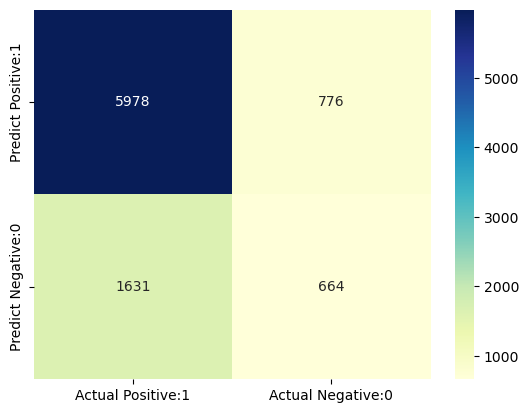

In [79]:
cm_matrix=pd.DataFrame(data=cm,columns=["Actual Positive:1","Actual Negative:0"],
                      index=["Predict Positive:1","Predict Negative:0"])

sns.heatmap(cm_matrix,annot=True,fmt="d",cmap="YlGnBu")

In [80]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       <=50K       0.79      0.89      0.83      6754
        >50K       0.46      0.29      0.36      2295

    accuracy                           0.73      9049
   macro avg       0.62      0.59      0.59      9049
weighted avg       0.70      0.73      0.71      9049



In [81]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [82]:
TP

5978

In [83]:
TN

664

In [84]:
FP

776

In [85]:
FN

1631

In [88]:
classification_accuracy=(TP+TN)/float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.7340


In [89]:
classification_error=(FP+FN)/float(TP+TN+FP+FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2660


In [90]:
precision=TP/float(TP+FP)
print("Precision:{0:0.4f}".format(precision))

Precision:0.8851


In [92]:
Recall=TP/float(TP+FN)
print("Recall:{0:0.4f}".format(Recall))

Recall:0.7856


In [93]:
True_positive_rate=TP/float(TP+FN)
print("True_positive_rate:{0:0.4f}".format(True_positive_rate))

True_positive_rate:0.7856


In [94]:
False_positive_rate=FP/float(FP+TN)
print("False_positive_rate:{0:0.4f}".format(False_positive_rate))

False_positive_rate:0.5389


In [95]:
y_pred_prob=gnb.predict_proba(xtest)[0:10]
y_pred_prob

array([[9.99848943e-01, 1.51057238e-04],
       [9.99984294e-01, 1.57064599e-05],
       [9.26722300e-02, 9.07327770e-01],
       [9.98338138e-01, 1.66186200e-03],
       [9.98902901e-01, 1.09709858e-03],
       [9.99667239e-01, 3.32760556e-04],
       [3.37213914e-06, 9.99996628e-01],
       [9.99928505e-01, 7.14951121e-05],
       [9.99988871e-01, 1.11293958e-05],
       [9.99917206e-01, 8.27940378e-05]])

In [97]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.999849,0.000151
1,0.999984,0.000016
2,0.092672,0.907328
3,0.998338,0.001662
4,0.998903,0.001097
5,0.999667,0.000333
6,0.000003,0.999997
7,0.999929,0.000071
8,0.999989,0.000011
9,0.999917,0.000083


In [98]:
gnb.predict_proba(xtest)[0:10,1]

array([1.51057238e-04, 1.57064599e-05, 9.07327770e-01, 1.66186200e-03,
       1.09709858e-03, 3.32760556e-04, 9.99996628e-01, 7.14951121e-05,
       1.11293958e-05, 8.27940378e-05])

In [101]:
y_pred1 = gnb.predict_proba(xtest)[:, 1]


In [102]:
y_pred1

array([1.51057238e-04, 1.57064599e-05, 9.07327770e-01, ...,
       4.40157761e-02, 1.16516810e-03, 3.14757774e-02])

Text(0, 0.5, 'Frequency')

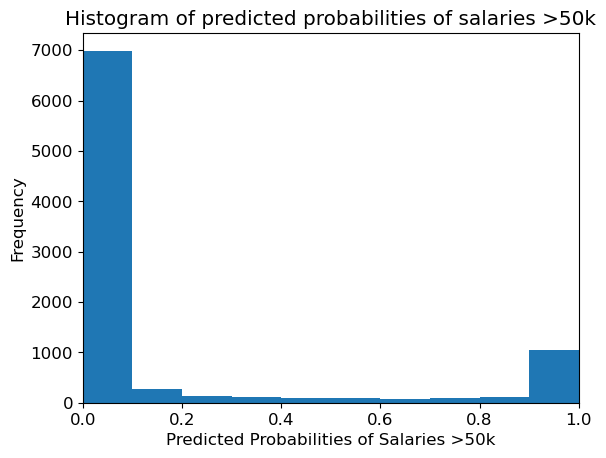

In [103]:

plt.rcParams["font.size"]=12
plt.hist(y_pred1,bins=10)
plt.title("Histogram of predicted probabilities of salaries >50k")
plt.xlim(0,1)
plt.xlabel("Predicted Probabilities of Salaries >50k")
plt.ylabel("Frequency")

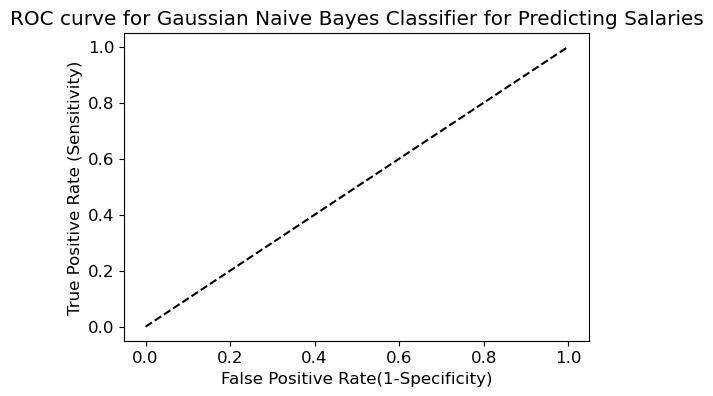

In [105]:
from sklearn.metrics import roc_curve

fpr,tpr,threshold=roc_curve(ytest,y_pred1,pos_label=">50k")

plt.figure(figsize=(6,4))

plt.plot([0,1],[0,1],"k--")

plt.rcParams["font.size"]=12

plt.title("ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries")

plt.xlabel("False Positive Rate(1-Specificity)")

plt.ylabel("True Positive Rate (Sensitivity)")

plt.show()

In [107]:
from sklearn.metrics import roc_auc_score

ROC_AUC=roc_auc_score(ytest,y_pred1)

print("ROC AUC :  {:.4f}".format(ROC_AUC))

ROC AUC :  0.5514


In [109]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC=cross_val_score(gnb,xtrain,ytrain,cv=5,scoring="roc_auc").mean()

print("Cross_validated_ROC_AUC:{:.4f}".format(Cross_validated_ROC_AUC))

Cross_validated_ROC_AUC:0.8915


In [111]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(gnb,xtrain,ytrain,cv=10,scoring="accuracy")

print("Cross validation scores:{}".format(scores))

Cross validation scores:[0.7907197  0.79450758 0.81430602 0.7825675  0.79156798 0.79819991
 0.80151587 0.79677878 0.80483183 0.81620085]


In [113]:
print("Average cross validation score:{:.4f}".format(scores.mean()))

Average cross validation score:0.7991
